In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from joblib import dump, load

#### Here, we import the file created as a result of Clustering. In addition to the original data, it has  a clusters column which contains information about the class variable.

In [2]:
df = pd.read_csv("zomato_with_clusters.csv")

## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 18 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [4]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
clusters                           0
dtype: int64

#### Observation: The columns rate, phone, location, rest_type, dish_liked, cuisines, approx_cost have missing values

In [5]:
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),clusters
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,1


## URL

In [6]:
print(df["url"].nunique(), "URLs in data:", df["url"].unique())

51717 URLs in data: ['https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 'https://www.zomato.com/bangalore/spice-elephant-banashankari?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwxODM3NTQ3NCwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 'https://www.zomato.com/SanchurroBangalore?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwiMTgzNzU0NzQiLDU5MDkwLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 ...
 'https://www.zomato.com/bangalore/plunge-sheraton-grand-bengaluru-whitefield-hotel-convention-centre-whitefield-bangalore?context=eyJzZSI6eyJlIjpbIjE4NjAyNDc4IiwiMTgyOTAwNTIiLCI1ODM1NCIsIjE4NzQxMTI5IiwxODY2MTA0MCwiMTg2NjEwODQiLCIxODY5MDgzNyJdLCJ0IjoiUHVicyAmYW1wOyBCY

#### Observation: The URL attribute has all unique entries and does not carry and patterns so it can be dropped from the dataframe

In [7]:
df.drop("url", axis=1, inplace=True)

## Address

In [8]:
print(df["address"].nunique(), "addresses in data:", df["address"].unique())

11495 addresses in data: ['942, 21st Main Road, 2nd Stage, Banashankari, Bangalore'
 '2nd Floor, 80 Feet Road, Near Big Bazaar, 6th Block, Kathriguppe, 3rd Stage, Banashankari, Bangalore'
 '1112, Next to KIMS Medical College, 17th Cross, 2nd Stage, Banashankari, Bangalore'
 ...
 'Cessna Business Park, Sarjapur Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x96 Marathahalli Outer Ring Road, Kadubeesanahalli, Bellandur Post, Bengaluru, Karnataka'
 '44, Kodigehalli to Hoodi Main Road, Mahadevapura Post, KR Puram, Bangalore'
 '139/C1, Next To GR Tech Park, Pattandur Agrahara, ITPL, Main Road, Whitefield, Bangalore']


In [9]:
df.drop("address", axis=1, inplace=True)

#### Observations
- We have only 11495 unique addresses in the data.
- It indicates that certain restaurants with different URLs on Zomato function from the same address.
- Also, since we have region information in the listed_in(city) attribute, we will drop the address column

## Name

In [10]:
print(df["name"].nunique(), "names in data:", df["name"].unique())

8792 names in data: ['Jalsa' 'Spice Elephant' 'San Churro Cafe' ... 'Nawabs Empire'
 'SeeYa Restaurant'
 'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...']


#### Observations: We have data for 8792 restaurant, this would include restaurant chains.

In [11]:
restaurant_chains = df["name"].value_counts()

In [12]:
restaurant_chains

Cafe Coffee Day                      96
Onesta                               85
Just Bake                            73
Empire Restaurant                    71
Five Star Chicken                    70
                                     ..
Campus Juice Corner                   1
Sri Rajalakshmi Sweets and Bakery     1
Get Grilled                           1
Incanto - The Zuri                    1
Nethravathi Military Hotel            1
Name: name, Length: 8792, dtype: int64

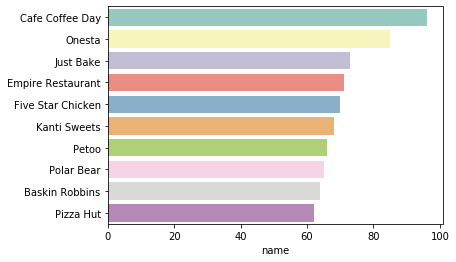

In [13]:
ax = sns.barplot(x = restaurant_chains[:10], y= restaurant_chains[:10].index, palette="Set3")

### The figure above shows the top 10 restaurant chains with maximum outlets. CCD dominates with close to 100 chains

#### The attribute name also does not carry much information right now except allowing groupBy option, so we will drop it

In [14]:
df.drop("name", axis=1, inplace=True)

## Online order

In [15]:
print(df["online_order"].nunique(), "possibilities for Online ordering in data:", df["online_order"].unique())

2 possibilities for Online ordering in data: ['Yes' 'No']


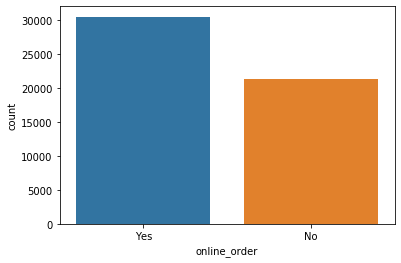

In [16]:
sns.countplot(df['online_order'])

### Observation : 30000+ restaurant accept online orders.

#### We will replace Yes with 1 and No with 0

In [17]:
df["online_order"] = df["online_order"].map({"Yes": 1, "No":0})

## Table Booking

In [18]:
print(df["book_table"].nunique(), "possibilities for Booking Table Online in data", df["book_table"].unique())

2 possibilities for Booking Table Online in data ['Yes' 'No']


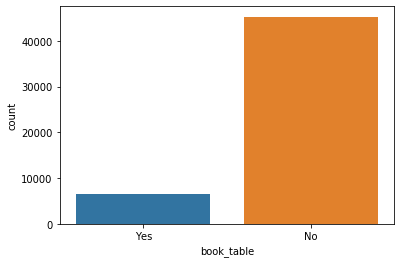

In [19]:
sns.countplot(df['book_table'])

### The figure above shows that more than 80% of the listed restaurants do not allow the provision of online table booking

#### We will replace Yes with 1 and No with 0

In [20]:
df["book_table"] = df["book_table"].map({"Yes": 1, "No":0})

## Rating

In [21]:
print(df["rate"].nunique(), "unique ratings", df["rate"].unique())

64 unique ratings ['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']


#### Replacing '-' and 'NEW' with NaN

In [22]:
print("Entries with hyphen - ", df.rate[df.rate == '-'].count())
print("Entries with NEW - ", df.rate[df.rate == 'NEW'].count())
print("Entries with nan - ", df.rate.isnull().sum())

Entries with hyphen -  69
Entries with NEW -  2208
Entries with nan -  7775


#### Making ratings numeric and understandable

In [23]:
df["rate"] = df.rate.replace('-', np.nan)
df["rate"] = df.rate.replace('NEW', np.nan)

## Votes

In [24]:
print(df["votes"].nunique(), "unique votes", df["votes"].unique())

2328 unique votes [ 775  787  918 ... 4957 2382  843]


## Phone

In [25]:
print(df["phone"].nunique(), "unique phone numbers", df["phone"].unique())

14926 unique phone numbers ['080 42297555\r\n+91 9743772233' '080 41714161' '+91 9663487993' ...
 '+91 9663517066\n+91 9686861135' '+91 9164562939' '080 65951222']


## Observations
- Since only 14926 entries are present this indicates that multiple restaurants have registered with the same phone number.
- Also, presently phone number does not add up much information, so we will drop the attribute

In [26]:
df.drop("phone", axis = 1, inplace = True)

## Location

In [27]:
print(df["location"].nunique(), "unique locations", df["location"].unique())

93 unique locations ['Banashankari' 'Basavanagudi' 'Mysore Road' 'Jayanagar'
 'Kumaraswamy Layout' 'Rajarajeshwari Nagar' 'Vijay Nagar' 'Uttarahalli'
 'JP Nagar' 'South Bangalore' 'City Market' 'Nagarbhavi'
 'Bannerghatta Road' 'BTM' 'Kanakapura Road' 'Bommanahalli' nan
 'CV Raman Nagar' 'Electronic City' 'HSR' 'Marathahalli' 'Sarjapur Road'
 'Wilson Garden' 'Shanti Nagar' 'Koramangala 5th Block'
 'Koramangala 8th Block' 'Richmond Road' 'Koramangala 7th Block'
 'Jalahalli' 'Koramangala 4th Block' 'Bellandur' 'Whitefield'
 'East Bangalore' 'Old Airport Road' 'Indiranagar' 'Koramangala 1st Block'
 'Frazer Town' 'RT Nagar' 'MG Road' 'Brigade Road' 'Lavelle Road'
 'Church Street' 'Ulsoor' 'Residency Road' 'Shivajinagar' 'Infantry Road'
 'St. Marks Road' 'Cunningham Road' 'Race Course Road' 'Commercial Street'
 'Vasanth Nagar' 'HBR Layout' 'Domlur' 'Ejipura' 'Jeevan Bhima Nagar'
 'Old Madras Road' 'Malleshwaram' 'Seshadripuram' 'Kammanahalli'
 'Koramangala 6th Block' 'Majestic' 'Langford To

In [28]:
print("Entries with nan - ", df.location.isnull().sum())

Entries with nan -  21


In [29]:
location = df.location.value_counts()

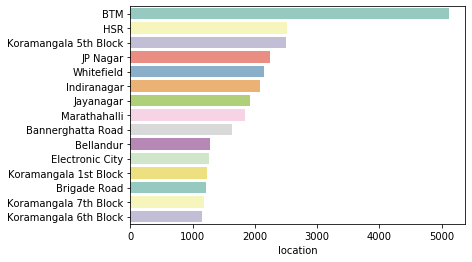

In [30]:
ax = sns.barplot(x = location[:15], y= location[:15].index, palette="Set3")

### Observation
BTM dominates in terms of number of restaurants

## Restaurant Type

In [31]:
print(df["rest_type"].nunique(), "unique restaurant types", df["rest_type"].unique())

93 unique restaurant types ['Casual Dining' 'Cafe, Casual Dining' 'Quick Bites' 'Casual Dining, Cafe'
 'Cafe' 'Quick Bites, Cafe' 'Cafe, Quick Bites' 'Delivery' 'Mess'
 'Dessert Parlor' 'Bakery, Dessert Parlor' 'Pub' 'Bakery'
 'Takeaway, Delivery' 'Fine Dining' 'Beverage Shop' 'Sweet Shop' 'Bar'
 'Beverage Shop, Quick Bites' 'Confectionery' 'Quick Bites, Beverage Shop'
 'Dessert Parlor, Sweet Shop' 'Bakery, Quick Bites'
 'Sweet Shop, Quick Bites' 'Kiosk' 'Food Truck'
 'Quick Bites, Dessert Parlor' 'Beverage Shop, Dessert Parlor' 'Takeaway'
 'Pub, Casual Dining' 'Casual Dining, Bar' 'Dessert Parlor, Beverage Shop'
 'Quick Bites, Bakery' 'Dessert Parlor, Quick Bites'
 'Microbrewery, Casual Dining' 'Lounge' 'Bar, Casual Dining' 'Food Court'
 'Cafe, Bakery' nan 'Dhaba' 'Quick Bites, Sweet Shop' 'Microbrewery'
 'Food Court, Quick Bites' 'Pub, Bar' 'Casual Dining, Pub' 'Lounge, Bar'
 'Food Court, Dessert Parlor' 'Casual Dining, Sweet Shop'
 'Food Court, Casual Dining' 'Casual Dining, Microbr

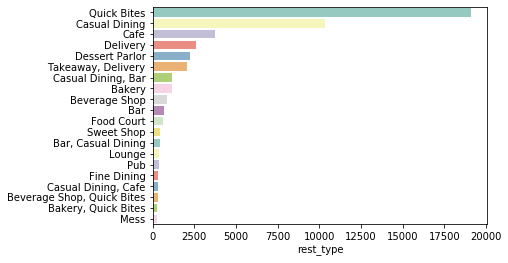

In [32]:
rest_type = df["rest_type"].value_counts()
ax = sns.barplot(x = rest_type[:20], y= rest_type[:20].index, palette="Set3")

### The plot above shows that Quick Bites and Casual Dining dominate the data

In [33]:
df_rest_type = df[df['rest_type'].notnull()]

### Some restaurant fall in multiple categories such as 'Cafe, Casual Dining'. Let's try and understand how many unique restaurant types are there.

In [34]:
rest_type = df_rest_type['rest_type']
rest_type_set = set()
for entry in rest_type:
    val = entry.split(',')
    for value in val:
        rest_type_set.add(value.strip())

In [35]:
rest_type_set

{'Bakery',
 'Bar',
 'Beverage Shop',
 'Bhojanalya',
 'Cafe',
 'Casual Dining',
 'Club',
 'Confectionery',
 'Delivery',
 'Dessert Parlor',
 'Dhaba',
 'Fine Dining',
 'Food Court',
 'Food Truck',
 'Irani Cafee',
 'Kiosk',
 'Lounge',
 'Meat Shop',
 'Mess',
 'Microbrewery',
 'Pop Up',
 'Pub',
 'Quick Bites',
 'Sweet Shop',
 'Takeaway'}

In [36]:
len(rest_type_set)

25

### Observation
There are 25 unique categories such that a restaurant can fall in one or more of these categories

## Dishes Liked

In [37]:
print(df["dish_liked"].nunique(), "unique dish_liked", df["dish_liked"].unique())

5271 unique dish_liked ['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup'
 'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani'
 'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza'
 ...
 'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian'
 'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani'
 'Biryani, Andhra Meal']


### Same dish can be liked at multiple restaurants. Let's try and understand how many unique dishes are being liked

In [38]:
df_dish_liked = df[df['dish_liked'].notnull()]

In [39]:
unique_dishes = set()
for entry in df_dish_liked["dish_liked"]:
    s = entry.split()
    for item in s:
        unique_dishes.add(item)

In [40]:
len(unique_dishes)

1883

#### Dishes liked is not conveying much information and happens to be a highly sparse matrix, so we will drop the column

In [41]:
df.drop("dish_liked", axis=1, inplace=True)

## Cuisines

In [42]:
print(df["cuisines"].nunique(), "cuisines", df["cuisines"].unique())

2723 cuisines ['North Indian, Mughlai, Chinese' 'Chinese, North Indian, Thai'
 'Cafe, Mexican, Italian' ... 'North Indian, Street Food, Biryani'
 'Chinese, Mughlai' 'North Indian, Chinese, Arabian, Momos']


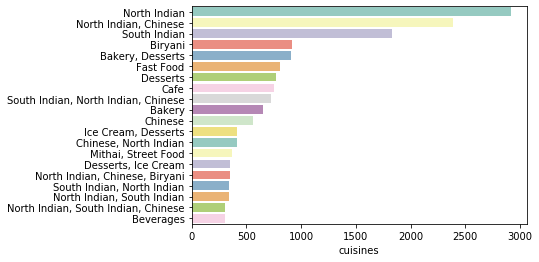

In [43]:
cuisines = df["cuisines"].value_counts()
ax = sns.barplot(x = cuisines[:20], y= cuisines[:20].index, palette="Set3")

In [44]:
df_cuisines = df[df['cuisines'].notnull()]

In [45]:
cuisines = df_cuisines['cuisines']

In [46]:
cuisines

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51672, dtype: object

In [47]:
cuisines_set = set()
for i, entry in enumerate(cuisines):
    val = entry.split(',')
    for value in val:
        if value == "Quick Bites":
            print("OK")
        cuisines_set.add(value.strip())

In [48]:
cuisines_set

{'Afghan',
 'Afghani',
 'African',
 'American',
 'Andhra',
 'Arabian',
 'Asian',
 'Assamese',
 'Australian',
 'Awadhi',
 'BBQ',
 'Bakery',
 'Bar Food',
 'Belgian',
 'Bengali',
 'Beverages',
 'Bihari',
 'Biryani',
 'Bohri',
 'British',
 'Bubble Tea',
 'Burger',
 'Burmese',
 'Cafe',
 'Cantonese',
 'Charcoal Chicken',
 'Chettinad',
 'Chinese',
 'Coffee',
 'Continental',
 'Desserts',
 'Drinks Only',
 'European',
 'Fast Food',
 'Finger Food',
 'French',
 'German',
 'Goan',
 'Greek',
 'Grill',
 'Gujarati',
 'Healthy Food',
 'Hot dogs',
 'Hyderabadi',
 'Ice Cream',
 'Indian',
 'Indonesian',
 'Iranian',
 'Italian',
 'Japanese',
 'Jewish',
 'Juices',
 'Kashmiri',
 'Kebab',
 'Kerala',
 'Konkan',
 'Korean',
 'Lebanese',
 'Lucknowi',
 'Maharashtrian',
 'Malaysian',
 'Malwani',
 'Mangalorean',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Mithai',
 'Modern Indian',
 'Momos',
 'Mongolian',
 'Mughlai',
 'Naga',
 'Nepalese',
 'North Eastern',
 'North Indian',
 'Oriya',
 'Paan',
 'Pan Asian',
 'Pa

In [49]:
len(cuisines_set)

107

### Observation

- There are 107 different cuisines altogether such that a restaurant can serve 1 or more of these.

## Approx Cost

In [50]:
print(df["approx_cost(for two people)"].nunique(), "approx cost values", df["approx_cost(for two people)"].unique())

70 approx cost values ['800' '300' '600' '700' '550' '500' '450' '650' '400' '900' '200' '750'
 '150' '850' '100' '1,200' '350' '250' '950' '1,000' '1,500' '1,300' '199'
 '80' '1,100' '160' '1,600' '230' '130' '50' '190' '1,700' nan '1,400'
 '180' '1,350' '2,200' '2,000' '1,800' '1,900' '330' '2,500' '2,100'
 '3,000' '2,800' '3,400' '40' '1,250' '3,500' '4,000' '2,400' '2,600'
 '120' '1,450' '469' '70' '3,200' '60' '560' '240' '360' '6,000' '1,050'
 '2,300' '4,100' '5,000' '3,700' '1,650' '2,700' '4,500' '140']


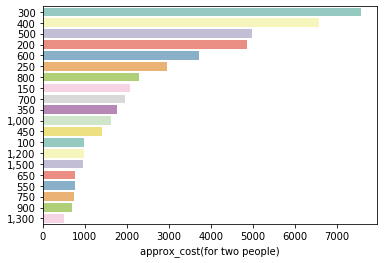

In [51]:
approx_cost = df["approx_cost(for two people)"].value_counts()
ax = sns.barplot(x = approx_cost[:20], y= approx_cost[:20].index, palette="Set3")

## Reviews

In [52]:
df.drop("reviews_list", axis=1, inplace=True)

#### Reviews carry a ot of textual information for us and this can be a separate task, so for this analysis we will drop the column.

## Menu Items

In [53]:
print(df["menu_item"].nunique(), "menu items", df["menu_item"].unique())

9098 menu items ['[]'
 "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Ch

#### Observations

- Of the 51717 restaurants, only the menu items for 9000+ restaurant is available with us, so we will drop this column as this has more that 80% of the columns with no values
- Even though the entry is not Null or Nan, they empty menus are represented by blank lists

In [54]:
df.drop("menu_item", axis=1, inplace=True)

## Category listed in

In [55]:
print(df["listed_in(type)"].nunique(), "listings based on type", df["listed_in(type)"].unique())

7 listings based on type ['Buffet' 'Cafes' 'Delivery' 'Desserts' 'Dine-out' 'Drinks & nightlife'
 'Pubs and bars']


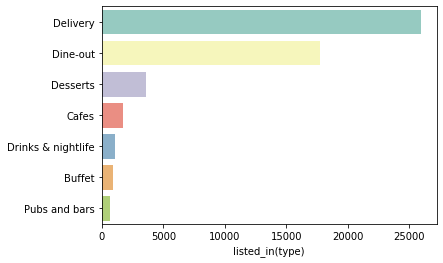

In [56]:
category_listed_in = df["listed_in(type)"].value_counts()
ax = sns.barplot(x = category_listed_in, y= category_listed_in.index, palette="Set3")

#### Observation
 - Most of the restaurants fall in the delivery category
 - Dine-out category is a close second

## Place Listed In

In [57]:
print(df["listed_in(city)"].nunique(), "listings based on city", df["listed_in(city)"].unique())

30 listings based on city ['Banashankari' 'Bannerghatta Road' 'Basavanagudi' 'Bellandur'
 'Brigade Road' 'Brookefield' 'BTM' 'Church Street' 'Electronic City'
 'Frazer Town' 'HSR' 'Indiranagar' 'Jayanagar' 'JP Nagar' 'Kalyan Nagar'
 'Kammanahalli' 'Koramangala 4th Block' 'Koramangala 5th Block'
 'Koramangala 6th Block' 'Koramangala 7th Block' 'Lavelle Road'
 'Malleshwaram' 'Marathahalli' 'MG Road' 'New BEL Road' 'Old Airport Road'
 'Rajajinagar' 'Residency Road' 'Sarjapur Road' 'Whitefield']


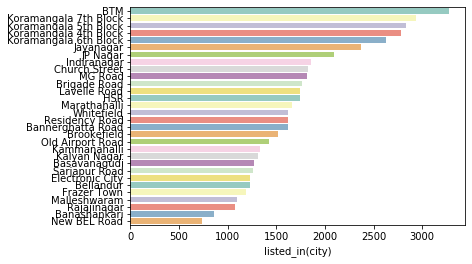

In [58]:
place_listed_in = df["listed_in(city)"].value_counts()
ax = sns.barplot(x = place_listed_in, y= place_listed_in.index, palette="Set3")

#### Observations
- BTM dominates in terms of number of restaurants.
- This attribute is pretty closely related to the Location attribute and for the same reason we will drop the **location** attribute and keep this
- More so location contains 93 entries compared to 30 here, this will be a comparitively less sparse matrix and also more abstracted in terms of place of restaurant
- Also, location has 21 NaN entries, hence keeping **Place Listed In** will be more beneficial

In [59]:
df.drop("location", axis = 1, inplace = True)

In [60]:
df.head(3)

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),clusters
0,1,1,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari,1
1,1,0,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari,1
2,1,0,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari,1


## Train Test Split

In [61]:
y = df.pop('clusters')
df.head(3)

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,1,1,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,1,0,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,1,0,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari


In [62]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0, stratify=y)

In [63]:
X_train.head(3)

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
9624,0,0,NaN,0,Quick Bites,"Biryani, South Indian",300,Delivery,BTM
26771,1,0,4.3/5,338,Casual Dining,"Chinese, Indonesian, Japanese, Malaysian, Thai...",800,Delivery,Koramangala 4th Block
48970,1,1,4.4 /5,139,Casual Dining,"Maharashtrian, Seafood",700,Delivery,Sarjapur Road


In [64]:
X_test.head(3)

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
44304,0,0,NaN,0,Mess,South Indian,200,Delivery,New BEL Road
48752,0,0,2.5 /5,22,Casual Dining,Chinese,"1,000",Dine-out,Residency Road
40788,0,0,2.1 /5,342,Quick Bites,"Biryani, North Indian",500,Delivery,Marathahalli


In [65]:
print("There are ", (y_train[y_train == 0]).count(), "and", (y_test[y_test == 0]).count(), "samples belongng to class 0 in train and test set respectively")

There are  34522 and 8631 samples belongng to class 0 in train and test set respectively


In [66]:
print("There are ", (y_train[y_train == 1]).count(), "and", (y_test[y_test == 1]).count(), "samples belongng to class 0 in train and test set respectively")

There are  6851 and 1713 samples belongng to class 0 in train and test set respectively


## Pre-processing numerical attributes

### Taking Care of Missing Values

In [67]:
print(X_train["rate"].nunique(), "unique ratings", X_test["rate"].unique())

62 unique ratings [nan '2.5 /5' '2.1 /5' '3.9 /5' '4.3 /5' '3.8/5' '4.3/5' '3.9/5' '3.6/5'
 '3.3 /5' '4.2 /5' '3.2 /5' '4.1 /5' '3.7/5' '4.0 /5' '3.1 /5' '3.5/5'
 '4.5/5' '3.4/5' '3.1/5' '4.1/5' '3.2/5' '3.3/5' '3.8 /5' '3.5 /5'
 '4.4 /5' '3.7 /5' '3.6 /5' '4.6/5' '3.4 /5' '2.5/5' '2.9 /5' '4.0/5'
 '4.9 /5' '4.2/5' '2.6/5' '4.6 /5' '4.5 /5' '3.0/5' '2.9/5' '2.4 /5'
 '2.8/5' '4.9/5' '4.4/5' '2.8 /5' '2.6 /5' '4.8 /5' '3.0 /5' '2.7 /5'
 '4.7 /5' '2.3/5' '2.2 /5' '1.8 /5' '4.7/5' '2.7/5' '2.0 /5' '2.4/5'
 '4.8/5' '2.2/5' '2.1/5' '2.3 /5' '2.0/5']


In [68]:
ratings = X_train.rate.dropna()
ratings = ratings.apply(lambda x : float(x.split('/')[0]))
print(ratings.mean())

3.6995885391638637


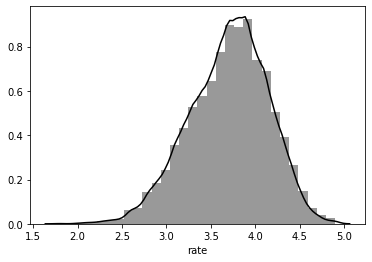

In [69]:
sns.distplot(ratings, bins=30, color='black')

### Observations
- Most of the restaurants have a rating between 3.5 and 4
- The ratings curve seems to be following Nornam Distributions under the specified conditions

### We can make use of Imputer here, but I feel the approach taken below provides more control

In [70]:
X_train["rate"] = X_train.rate.replace(np.nan, (str(ratings.mean()) + "/5"))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
X_test["rate"] = X_test.rate.replace(np.nan, (str(ratings.mean()) + "/5"))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
X_train["rate"] = X_train.rate.apply(lambda x : float(x.split('/')[0]))
X_test["rate"] = X_test.rate.apply(lambda x : float(x.split('/')[0]))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
X_test["rate"]

44304    3.699589
48752    2.500000
40788    2.100000
7694     3.699589
50820    3.699589
           ...   
25600    3.800000
527      3.200000
16981    4.200000
31560    3.100000
22518    3.699589
Name: rate, Length: 10344, dtype: float64

In [74]:
approx_cost = X_train['approx_cost(for two people)'].dropna().str.replace(',', '').astype(float)
print(approx_cost.mean())

555.8759763486386


In [75]:
X_train['approx_cost(for two people)'] = X_train['approx_cost(for two people)'].str.replace(',', '').astype(float)
X_test['approx_cost(for two people)'] = X_test['approx_cost(for two people)'].str.replace(',', '').astype(float)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
X_train['approx_cost(for two people)'] = X_train['approx_cost(for two people)'].replace(np.nan, str(approx_cost.mean()))
X_test['approx_cost(for two people)'] = X_test['approx_cost(for two people)'].replace(np.nan, str(approx_cost.mean()))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [77]:
X_train.head()

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
9624,0,0,3.699589,0,Quick Bites,"Biryani, South Indian",300,Delivery,BTM
26771,1,0,4.300000,338,Casual Dining,"Chinese, Indonesian, Japanese, Malaysian, Thai...",800,Delivery,Koramangala 4th Block
48970,1,1,4.400000,139,Casual Dining,"Maharashtrian, Seafood",700,Delivery,Sarjapur Road
42942,0,0,3.800000,26,"Dessert Parlor, Bakery","Desserts, Bakery",500,Delivery,MG Road
47333,0,0,3.699589,0,Cafe,"Cafe, Continental, Desserts",800,Cafes,Residency Road


### Standardizing Numerical Attributes

### Unlike Clustering, here the values are obtained from the training data and applied both to training and test data as compared to fetching values from entire data during Clustering

In [78]:
sc = StandardScaler()

In [79]:
X_train[['rate', 'votes', 'approx_cost(for two people)']] = sc.fit_transform(X_train[['rate', 'votes', 'approx_cost(for two people)']])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [80]:
X_test[['rate', 'votes', 'approx_cost(for two people)']] = sc.transform(X_test[['rate', 'votes', 'approx_cost(for two people)']])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Saving the Standard Scalar operation and values

In [81]:
dump(sc, 'std_scaler.bin', compress=True)

['std_scaler.bin']

In [82]:
# sc=load('std_scaler.bin')

## Pre-processing Categorical attributes

In [83]:
X_train.head(3)

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
9624,0,0,-1.122627e-15,-0.351256,Quick Bites,"Biryani, South Indian",-0.584138,Delivery,BTM
26771,1,0,1.517799e+00,0.068740,Casual Dining,"Chinese, Indonesian, Japanese, Malaysian, Thai...",0.557309,Delivery,Koramangala 4th Block
48970,1,1,1.770592e+00,-0.178536,Casual Dining,"Maharashtrian, Seafood",0.329020,Delivery,Sarjapur Road


### Taking care of missing values

In [84]:
most_frequent_restaurant_type = X_train['rest_type'].mode().iloc[0]
print(most_frequent_restaurant_type)

Quick Bites


In [85]:
X_train['rest_type'] = X_train['rest_type'].fillna(most_frequent_restaurant_type)
X_test['rest_type'] = X_test['rest_type'].fillna(most_frequent_restaurant_type)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
most_frequent_cuisine = X_train['cuisines'].mode().iloc[0]
print(most_frequent_cuisine)

North Indian


In [87]:
X_train['cuisines'] = X_train['cuisines'].fillna(most_frequent_cuisine)
X_test['cuisines'] = X_test['cuisines'].fillna(most_frequent_cuisine)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
cuisines_set

{'Afghan',
 'Afghani',
 'African',
 'American',
 'Andhra',
 'Arabian',
 'Asian',
 'Assamese',
 'Australian',
 'Awadhi',
 'BBQ',
 'Bakery',
 'Bar Food',
 'Belgian',
 'Bengali',
 'Beverages',
 'Bihari',
 'Biryani',
 'Bohri',
 'British',
 'Bubble Tea',
 'Burger',
 'Burmese',
 'Cafe',
 'Cantonese',
 'Charcoal Chicken',
 'Chettinad',
 'Chinese',
 'Coffee',
 'Continental',
 'Desserts',
 'Drinks Only',
 'European',
 'Fast Food',
 'Finger Food',
 'French',
 'German',
 'Goan',
 'Greek',
 'Grill',
 'Gujarati',
 'Healthy Food',
 'Hot dogs',
 'Hyderabadi',
 'Ice Cream',
 'Indian',
 'Indonesian',
 'Iranian',
 'Italian',
 'Japanese',
 'Jewish',
 'Juices',
 'Kashmiri',
 'Kebab',
 'Kerala',
 'Konkan',
 'Korean',
 'Lebanese',
 'Lucknowi',
 'Maharashtrian',
 'Malaysian',
 'Malwani',
 'Mangalorean',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Mithai',
 'Modern Indian',
 'Momos',
 'Mongolian',
 'Mughlai',
 'Naga',
 'Nepalese',
 'North Eastern',
 'North Indian',
 'Oriya',
 'Paan',
 'Pan Asian',
 'Pa

### We create a cuisine dict such that cuisine positions here will be used to One Hot Encode the cuisine values

In [90]:
cuisine_dict = {}
for i, cuisine in enumerate(cuisines_set):
    cuisine_dict[cuisine] = i

In [91]:
cuisine_dict

{'French': 0,
 'Asian': 1,
 'Lebanese': 2,
 'Hyderabadi': 3,
 'Sindhi': 4,
 'Tea': 5,
 'Mughlai': 6,
 'Hot dogs': 7,
 'Beverages': 8,
 'Thai': 9,
 'Kashmiri': 10,
 'Sri Lankan': 11,
 'Seafood': 12,
 'Roast Chicken': 13,
 'Continental': 14,
 'Bubble Tea': 15,
 'Middle Eastern': 16,
 'Mexican': 17,
 'American': 18,
 'Goan': 19,
 'Modern Indian': 20,
 'Malwani': 21,
 'Bihari': 22,
 'Sushi': 23,
 'Ice Cream': 24,
 'Chinese': 25,
 'BBQ': 26,
 'Tex-Mex': 27,
 'Steak': 28,
 'Wraps': 29,
 'Raw Meats': 30,
 'Assamese': 31,
 'Tamil': 32,
 'Afghani': 33,
 'Bar Food': 34,
 'Momos': 35,
 'Indonesian': 36,
 'Malaysian': 37,
 'Paan': 38,
 'Bakery': 39,
 'Mediterranean': 40,
 'Gujarati': 41,
 'German': 42,
 'Afghan': 43,
 'Vegan': 44,
 'Charcoal Chicken': 45,
 'South American': 46,
 'Japanese': 47,
 'Nepalese': 48,
 'Cafe': 49,
 'Turkish': 50,
 'Vietnamese': 51,
 'North Eastern': 52,
 'Australian': 53,
 'Andhra': 54,
 'Healthy Food': 55,
 'Singaporean': 56,
 'Rajasthani': 57,
 'Juices': 58,
 'Arabian'

In [92]:
def oneHotEncodeCuisine(data, cuisine_set, cuisine_dict):
    indexes = data.index
    cuisine_encoded_list = []
    for i, restaurant_cuisine in enumerate(data):
        val = restaurant_cuisine.split(',')
        l = [0]*len(cuisine_set)
        for value in val:
            l[cuisine_dict[value.strip()]] = 1
        cuisine_encoded_list.append(l)
    df = pd.DataFrame(cuisine_encoded_list, columns = cuisine_set, index = indexes)
    return df

In [93]:
oneHotEncodedCuisineDFTrain = oneHotEncodeCuisine(X_train["cuisines"], cuisines_set, cuisine_dict)
oneHotEncodedCuisineDFTest = oneHotEncodeCuisine(X_test["cuisines"], cuisines_set, cuisine_dict)

In [94]:
oneHotEncodedCuisineDFTrain.head(3)

,French,Asian,Lebanese,Hyderabadi,Sindhi,Tea,Mughlai,Hot dogs,Beverages,Thai,...,Spanish,Mangalorean,Kerala,Lucknowi,Desserts,Italian,Konkan,Maharashtrian,Salad,Rolls
9624,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26771,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
48970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [95]:
X_train = pd.concat([X_train, oneHotEncodedCuisineDFTrain], axis = 1)
X_test = pd.concat([X_test, oneHotEncodedCuisineDFTest], axis = 1)

### Removing the original cuisines attribute after one hot encodings for them have been created and merged to dataframe

In [96]:
X_train.pop('cuisines')
X_test.pop('cuisines')

44304                              South Indian
48752                                   Chinese
40788                     Biryani, North Indian
7694                  Bakery, Fast Food, Juices
50820       Chinese, South Indian, North Indian
                          ...                  
25600    Andhra, Seafood, North Indian, Chinese
527                         Desserts, Ice Cream
16981        Continental, North Indian, Mughlai
31560                             Maharashtrian
22518                               Continental
Name: cuisines, Length: 10344, dtype: object

In [98]:
rest_type_set

{'Bakery',
 'Bar',
 'Beverage Shop',
 'Bhojanalya',
 'Cafe',
 'Casual Dining',
 'Club',
 'Confectionery',
 'Delivery',
 'Dessert Parlor',
 'Dhaba',
 'Fine Dining',
 'Food Court',
 'Food Truck',
 'Irani Cafee',
 'Kiosk',
 'Lounge',
 'Meat Shop',
 'Mess',
 'Microbrewery',
 'Pop Up',
 'Pub',
 'Quick Bites',
 'Sweet Shop',
 'Takeaway'}

### We create a restaurant type dict such that restaurant type positions here will be used to One Hot Encode the restaurant type values

In [99]:
restaurant_dict = {}
for i, restaurant in enumerate(rest_type_set):
    restaurant_dict[restaurant] = i

In [100]:
restaurant_dict

{'Irani Cafee': 0,
 'Confectionery': 1,
 'Lounge': 2,
 'Bhojanalya': 3,
 'Meat Shop': 4,
 'Microbrewery': 5,
 'Mess': 6,
 'Pub': 7,
 'Takeaway': 8,
 'Bakery': 9,
 'Delivery': 10,
 'Club': 11,
 'Bar': 12,
 'Dessert Parlor': 13,
 'Food Court': 14,
 'Food Truck': 15,
 'Fine Dining': 16,
 'Sweet Shop': 17,
 'Quick Bites': 18,
 'Casual Dining': 19,
 'Kiosk': 20,
 'Dhaba': 21,
 'Cafe': 22,
 'Beverage Shop': 23,
 'Pop Up': 24}

In [101]:
def oneHotEncodeRestaurant(data, restaurant_set, restaurant_dict):
    indexes = data.index
    restaurant_serving_encoded_list = []
    for i, restaurant_serving in enumerate(data):
        val = restaurant_serving.split(',')
        l = [0]*len(restaurant_set)
        for value in val:
            l[restaurant_dict[value.strip()]] = 1
        restaurant_serving_encoded_list.append(l)
    df = pd.DataFrame(restaurant_serving_encoded_list, columns = restaurant_set, index = indexes)
    return df

In [102]:
oneHotEncodedRestDFTrain = oneHotEncodeRestaurant(X_train["rest_type"], rest_type_set, restaurant_dict)
oneHotEncodedRestDFTest = oneHotEncodeRestaurant(X_test["rest_type"], rest_type_set, restaurant_dict)

In [103]:
oneHotEncodedRestDFTest.head(3)

,Irani Cafee,Confectionery,Lounge,Bhojanalya,Meat Shop,Microbrewery,Mess,Pub,Takeaway,Bakery,...,Food Truck,Fine Dining,Sweet Shop,Quick Bites,Casual Dining,Kiosk,Dhaba,Cafe,Beverage Shop,Pop Up
44304,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
40788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [104]:
X_train = pd.concat([X_train, oneHotEncodedRestDFTrain], axis = 1)
X_test = pd.concat([X_test, oneHotEncodedRestDFTest], axis = 1)

### Removing the original rest_type attribute after one hot encodings for them have been created and merged to dataframe

In [105]:
X_train.pop('rest_type')
X_test.pop('rest_type')

44304                   Mess
48752          Casual Dining
40788            Quick Bites
7694     Bakery, Quick Bites
50820            Quick Bites
                ...         
25600          Casual Dining
527           Dessert Parlor
16981     Casual Dining, Bar
31560            Quick Bites
22518            Quick Bites
Name: rest_type, Length: 10344, dtype: object

In [106]:
X_train.shape

(41373, 139)

### Label Encoding and One Hot Encoding the listed_in(type) and listed_in(city) attributes

In [107]:
le_listed_in_type = LabelEncoder()
X_train["listed_in(type)"] = le_listed_in_type.fit_transform(X_train["listed_in(type)"])
X_test["listed_in(type)"] = le_listed_in_type.transform(X_test["listed_in(type)"])
dump(le_listed_in_type, 'le_listed_in_type.joblib') 

['le_listed_in_type.joblib']

In [108]:
le_listed_in_city = LabelEncoder()
X_train["listed_in(city)"] = le_listed_in_city.fit_transform(X_train["listed_in(city)"])
X_test["listed_in(city)"] = le_listed_in_city.transform(X_test["listed_in(city)"])
dump(le_listed_in_city, 'le_listed_in_city.joblib')

['le_listed_in_city.joblib']

In [109]:
onehotencoder = OneHotEncoder(categorical_features = [5,6])
X_train = onehotencoder.fit_transform(X_train).toarray()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [110]:
X_train.shape

(41373, 174)

In [111]:
dump(onehotencoder, 'onehotencoder.joblib') 

['onehotencoder.joblib']

In [112]:
onehotencoder = load('onehotencoder.joblib') 

In [113]:
X_test = onehotencoder.transform(X_test).toarray()

In [114]:
X_test.shape

(10344, 174)

## Classification
Multiple algorithms would be tried with our data.

- k-Nearest Neighbours
- Decision Trees
- Random Forest
- Support Vector Machines

### Model Evaluation
We evaluate our models based on Accuracy, Precision, Recall and F1-Score.

## k-Nearest Neighbours

In [115]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
print("Precision: ", precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred))

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

Accuracy:  0.9917826759474091
Precision:  0.9897713598074609
Recall:  0.9603035610040864
F1 Score:  0.9748148148148148


array([[8614,   17],
       [  68, 1645]])

## Decision Tree

In [116]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
print("Precision: ", precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
cm

Accuracy:  0.9974864655839134
Precision:  0.994141769185706
Recall:  0.9906596614127262
F1 Score:  0.9923976608187135


array([[8621,   10],
       [  16, 1697]])

## Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
print("Precision: ", precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred))

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

Accuracy:  0.9973897911832946
Precision:  0.9947183098591549
Recall:  0.989492119089317
F1 Score:  0.9920983318700615


array([[8622,    9],
       [  18, 1695]])

## Support Vector Machines

In [118]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
print("Precision: ", precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred))

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

Accuracy:  0.9988399071925754
Precision:  0.9982425307557118
Recall:  0.9947460595446584
F1 Score:  0.9964912280701754


array([[8628,    3],
       [   9, 1704]])

### Saving the SVM based classifier as it has the best metric values and would be used for future prediction

In [119]:
dump(classifier, 'svm_classifier.joblib') 

['svm_classifier.joblib']

## Conclusion and Future Work

1. Reviews and Dishes Liked can be used to create features so as to cater classification. However, this can be treated as a separate task itself.
2. A lot of Exploratory Data Analysis can be performed where we pit in explore multiple attributes together such as using Crosstab etc.
3. We can create predictors to predict missing categorical values instead of filling them up with the mode.
4. We can try with other classification algorithms as well.